In [131]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [132]:
train_data = pd.read_csv(r"TrainingData.csv" , encoding='ISO-8859-1')
test_data = pd.read_csv(r"TestData.csv" , encoding='ISO-8859-1')


In [133]:
train_data["profession"]=pd.factorize(train_data.profession)[0]
train_data["married"]=pd.factorize(train_data.married)[0]
train_data["house_ownership"]=pd.factorize(train_data.house_ownership)[0]
train_data["car_ownership"]=pd.factorize(train_data.car_ownership)[0]
train_data["city"]=pd.factorize(train_data.city)[0]
train_data["state"]=pd.factorize(train_data.state)[0]

In [134]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 5))
td=scaler.fit_transform(train_data)

In [135]:
td=pd.DataFrame(td, columns=train_data.columns)
td["married"]=pd.factorize(td.married)[0]
td["Id"]=pd.factorize(td.Id)[0]
td["house_ownership"]=pd.factorize(td.house_ownership)[0]
td["car_ownership"]=pd.factorize(td.car_ownership)[0]
td.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,0,0.647434,0.172414,0.75,0,0,0,0.0,0.000000,0.000000,1.071429,3.75,0.0
1,1,3.786030,1.637931,2.50,0,0,0,0.1,0.015823,0.178571,3.214286,3.75,0.0
2,2,1.992819,3.879310,1.00,1,0,0,0.2,0.031646,0.357143,1.428571,0.00,0.0
3,3,3.126313,1.724138,0.50,0,0,1,0.1,0.047468,0.535714,0.714286,2.50,5.0
4,4,2.882270,2.241379,2.75,0,0,0,0.3,0.063291,0.714286,1.071429,5.00,5.0


In [155]:
xtrain=td.drop("risk_flag",axis=1)
xtrain=xtrain.drop("city",axis=1)
xtrain=xtrain.drop("Id",axis=1)
xtrain=xtrain.drop("state",axis=1)
xtrain=xtrain.drop("profession",axis=1)
ytrain=train_data["risk_flag"]
xtrain.head()

,income,age,experience,married,house_ownership,car_ownership,current_job_years,current_house_years
0,0.647434,0.172414,0.75,0,0,0,1.071429,3.75
1,3.786030,1.637931,2.50,0,0,0,3.214286,3.75
2,1.992819,3.879310,1.00,1,0,0,1.428571,0.00
3,3.126313,1.724138,0.50,0,0,1,0.714286,2.50
4,2.882270,2.241379,2.75,0,0,0,1.071429,5.00


In [161]:
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(xtrain, ytrain, test_size=0.33)

In [157]:
print(X_train_st.shape, X_test_st.shape, y_train_st.shape, y_test_st.shape)

(126000, 8) (126000, 8) (126000,) (126000,)


In [55]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [56]:
model.fit(X_train_st,y_train_st)

MemoryError: could not allocate 3145728 bytes

In [14]:
model.score(xtrain,ytrain)

0.9697619047619047

In [15]:
model.score(X_test_st,y_test_st)

0.9083694083694084

In [139]:
test_data["profession"]=pd.factorize(test_data.profession)[0]
test_data["married"]=pd.factorize(test_data.married)[0]
test_data["house_ownership"]=pd.factorize(test_data.house_ownership)[0]
test_data["car_ownership"]=pd.factorize(test_data.car_ownership)[0]
test_data["city"]=pd.factorize(test_data.city)[0]
test_data["state"]=pd.factorize(test_data.state)[0]

In [140]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 5))
tstd=scaler.fit_transform(test_data)

In [141]:
tstd=pd.DataFrame(tstd, columns=test_data.columns)
tstd["married"]=pd.factorize(tstd.married)[0]
tstd["id"]=pd.factorize(tstd.id)[0]
tstd["house_ownership"]=pd.factorize(tstd.house_ownership)[0]
tstd["car_ownership"]=pd.factorize(tstd.car_ownership)[0]
tstd.head()

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,0,3.695269,3.275862,4.75,0,0,0,0.0,0.000000,0.000000,1.428571,3.75
1,1,0.602980,0.344828,1.25,0,0,0,0.1,0.015823,0.178571,1.785714,0.00
2,2,4.450187,2.500000,3.00,0,0,0,0.2,0.031646,0.178571,3.214286,5.00
3,3,0.968072,2.413793,2.25,1,0,1,0.3,0.047468,0.178571,1.071429,2.50
4,4,0.001561,0.344828,4.50,0,0,1,0.4,0.063291,0.000000,4.642857,1.25


In [158]:
xtest_final=tstd.drop("city",axis=1)
xtest_final=xtest_final.drop("state",axis=1)
xtest_final=xtest_final.drop("profession",axis=1)
xtest_final=xtest_final.drop("id",axis=1)
xtest_final.head()

,income,age,experience,married,house_ownership,car_ownership,current_job_years,current_house_years
0,3.695269,3.275862,4.75,0,0,0,1.428571,3.75
1,0.602980,0.344828,1.25,0,0,0,1.785714,0.00
2,4.450187,2.500000,3.00,0,0,0,3.214286,5.00
3,0.968072,2.413793,2.25,1,0,1,1.071429,2.50
4,0.001561,0.344828,4.50,0,0,1,4.642857,1.25


In [23]:
predicted = model.predict(xtest_final)

In [24]:
predicted=pd.DataFrame(predicted)

In [25]:
predicted.to_csv('final.csv')

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
nb = GaussianNB()

In [28]:
nb.fit(X_train_st,y_train_st)

GaussianNB()

In [31]:
nb.score(xtrain,ytrain)

0.877

In [32]:
nb.score(X_test_st,y_test_st)

0.8771765271765272

In [33]:
predicted = nb.predict(xtest_final)
predicted=pd.DataFrame(predicted)
predicted.to_csv('final.csv')

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_accuracy = 0



        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train_st,y_train_st)
dt.score(X_test_st,y_test_st)

0.822595238095238

In [162]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0



        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=50,  max_depth=70, n_estimators=85)
rf.fit(X_train_st,y_train_st)
print(rf.score(X_train_st,y_train_st))
print(rf.score(X_test_st,y_test_st))

0.9380063965884862
0.8963804713804714


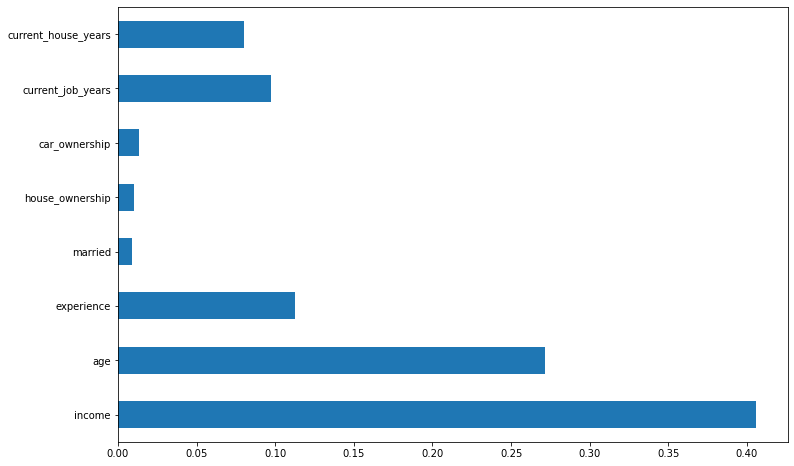

In [163]:
importances = pd.Series(rf.feature_importances_, index=X_train_st.columns)

# plot the horizontal bar chart
importances.plot(kind='barh', figsize=(12,8))

In [164]:
predicted = rf.predict(xtest_final)
predicted=pd.DataFrame(predicted)
predicted.to_csv('final2.csv')

In [ ]:
LOGISTIC REGRESSION

In [92]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=20)

lr.fit(X_train_st,y_train_st)

lr.score(X_test_st,y_test_st)

0.8774126984126984

In [94]:
from keras.models import Sequential
from keras.layers import Dense

ModuleNotFoundError: No module named 'keras'

In [ ]:
HYPER TUNING

In [144]:
from sklearn.model_selection import GridSearchCV

In [147]:
paramgrid = {'max_depth': list(range(1, 100, 3)), 'n_estimators': list(range(1, 200, 20))}

In [148]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

In [151]:
grid_search.fit(X_train_st, y_train_st)

KeyboardInterrupt: 

In [ ]:
grid_search.best_estimator_